Step 2:
Model Code and Sentiment Analysis:

In [5]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #Python library for working with text
from nltk.tokenize import word_tokenize ## Tokenizing into word
from nltk.tokenize import sent_tokenize ## Tokenizing into sentence
from nltk.corpus import stopwords ## Stopwords
from nltk.stem import PorterStemmer # Stemming algorithm
# We need WordNet and Punkt for tokenization and lemmatization
from nltk.corpus import wordnet # for WordNet-compatible POS tags
from nltk.tag import pos_tag # to assign POS tags to words
from nltk.stem import WordNetLemmatizer # from NLTK for lemmatization


import re ## Regular Expression

In [3]:
#Download necessary NLTK resources
import nltk
nltk.download('punkt_tab') ## For tokenization
nltk.download('stopwords') ## For accessing stop word list
nltk.download('averaged_perceptron_tagger_eng') ## For POS tagging


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Birendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Birendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#loading previously cleaned dataset from step 1

df = pd.read_csv("amazon_reviews.csv")
df.head()

,overall,verified,reviewTime,reviewerID,Product_ID,reviewerName,Reviews,summary,unixReviewTime
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,Great product,1377129600
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,Five Stars,1454889600
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,Perfect size,1429833600
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,Five Stars,1426896000


In [7]:
 #Text Preprocessing

stop_words = set(stopwords.words('english')) ## Load English stop words
lemmatizer = WordNetLemmatizer() #Lemmatization with POS Tagging - Context-aware word normalization

# Helper function to get WordNet POS tag
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper() # Get the first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) # Default to noun if tag is not found

#Preprocess the text with tokenization, lowercasing, and removing stop words using NLTK
def preprocess(text):
    text = str(text).lower() #All characters are converted to lowercase for consistency
    text = re.sub(r'[^a-z\s]', '', text) #Special Character Removal - Removing punctuation or special symbols
    tokens = word_tokenize(text) #Tokenization: Splitting text into individual words
    tokens = [word for word in tokens if word not in stop_words] #- Removing common words that add no semantic value
    tokens = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in tokens] #Lemmatization
    return ' '.join(tokens)

df['processed_reviews'] = df['Reviews'].apply(preprocess)
df.head()

,overall,verified,reviewTime,reviewerID,Product_ID,reviewerName,Reviews,summary,unixReviewTime,processed_reviews
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,like vent well something keep house warmer win...
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,Five Stars,1454889600,good item
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,fit new lg dryer perfectly
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,good value electric dryer
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,price delivery excellent


In [8]:
# Label sentiment categories as Positive, Negative, or Neutral based on review ratings.

def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['overall'].apply(label_sentiment)
df.head()

,overall,verified,reviewTime,reviewerID,Product_ID,reviewerName,Reviews,summary,unixReviewTime,processed_reviews,sentiment
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,like vent well something keep house warmer win...,Positive
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,Five Stars,1454889600,good item,Positive
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,fit new lg dryer perfectly,Positive
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,good value electric dryer,Positive
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,price delivery excellent,Positive


In [11]:
# Convert text to numerical features using TF-IDF. 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_reviews'])
y = df['sentiment']

TF-IDF calculates that how relevant a word in a series or corpus is to a text. 
The meaning increases proportionally to the number of times in the text a word appears 
but is compensated by the word frequency in the data-set.

Model training, Evaluation, and Prediction

In [12]:
# First split the dataset into training and testing sets with train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#  Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression #import library

model = LogisticRegression() #choosing LogisticRegression as a model
model.fit(X_train, y_train) #model fitting

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
#Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

from sklearn.metrics import classification_report #importing necessary library

y_pred = model.predict(X_test) #testing the model 
print(classification_report(y_test, y_pred)) # model accuracy print

              precision    recall  f1-score   support

    Negative       1.00      0.20      0.33         5
     Neutral       1.00      0.98      0.99        84
    Positive       0.98      1.00      0.99       367

    accuracy                           0.99       456
   macro avg       0.99      0.73      0.77       456
weighted avg       0.99      0.99      0.98       456



LogisticRegression model is better in finding 1. I think the reason is that dataset has more positive data. Accuracy is 99%. It is pretty good

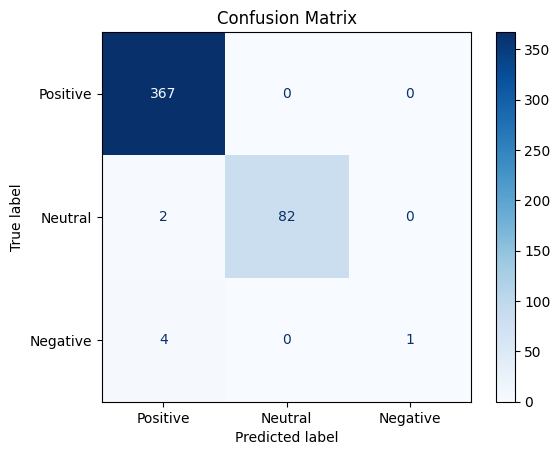

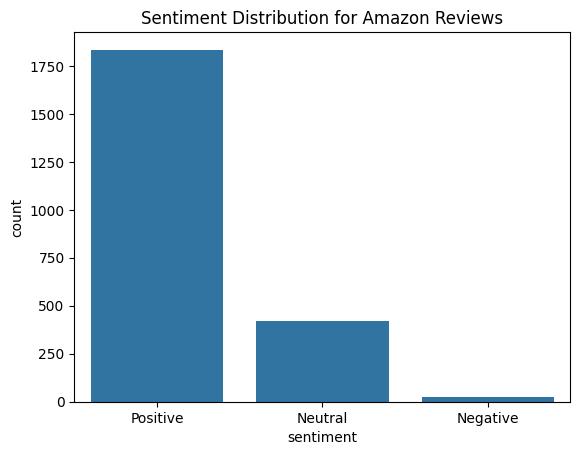

In [14]:
#Visualize results with confusion matrices and sentiment distribution plots.

#import necessary library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#heat map
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#plotting sentiment distribution of positive, neutral, and negative sentiment scores.
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for Amazon Reviews')
plt.show()

Above results indicates that most of the reviews are positive 
and with a high sentiment polarity in positivity while the negative reviews are few and have low sentiment polarity .

In [12]:
#Save Results
#writing to csv file
df.to_csv("processed_reviews.csv", index=False) 
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).to_csv("predictions.csv", index=False)

print("Project complete. Results saved.")

Project complete. Results saved.


Conclusion:

Summary of Findings:

1) Model Logistic Regression performed well, with a high number of positive reviews and very few negative reviews.
2) The sentiment analysis revealed that most of the reviews in the dataset were positive, indicating overall satisfaction with the products.
3) Incorporating additional features such as product categories could enhance the analysis and provide deeper insights into customer sentiment.